In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('./origin_data/train.csv')
train.drop(columns=['id'],inplace=True)
train = train.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
print(train.columns)
print(train.dtypes)
train.describe(include='all')


Index(['SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Acceptors',
       'Donors', 'RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea'],
      dtype='object')
SMILES                         object
MLM                           float64
HLM                           float64
AlogP                         float64
Molecular_Weight              float64
Acceptors                       int64
Donors                          int64
RotatableBonds                  int64
LogD                          float64
Molecular_PolarSurfaceArea    float64
dtype: object


,SMILES,MLM,HLM,AlogP,Molecular_Weight,Acceptors,Donors,RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3498,3498.000000,3498.000000,3496.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
unique,3471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,COCCOc1cc(=O)n2c(c1C(=O)N1CCCC1)CCOCC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.384742,53.090206,2.841399,363.881846,4.016581,1.098628,4.561178,2.682156,79.747278
std,NaN,35.695993,36.080081,1.608073,79.527022,1.511091,0.976266,2.357243,1.666996,28.849229
min,NaN,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,NaN,2.433000,15.905500,1.833000,304.389750,3.000000,0.000000,3.000000,1.620000,60.150000
50%,NaN,26.193000,58.023000,2.889000,350.255000,4.000000,1.000000,4.000000,2.709000,77.525000
75%,NaN,70.807250,87.753000,3.958250,409.744750,5.000000,2.000000,6.000000,3.860000,96.540000


In [31]:
train_corr = train.drop(columns=['SMILES']).corr()
train_corr

,MLM,HLM,AlogP,Molecular_Weight,Acceptors,Donors,RotatableBonds,LogD,Molecular_PolarSurfaceArea
MLM,1.000000,0.706725,-0.330083,-0.081239,0.164510,0.210836,-0.092563,-0.350146,0.184850
HLM,0.706725,1.000000,-0.346022,-0.175117,0.092313,0.176549,-0.132263,-0.357456,0.094323
AlogP,-0.330083,-0.346022,1.000000,0.389760,-0.284415,-0.172222,0.111844,0.957611,-0.298194
Molecular_Weight,-0.081239,-0.175117,0.389760,1.000000,0.471814,0.116186,0.583711,0.369462,0.439114
Acceptors,0.164510,0.092313,-0.284415,0.471814,1.000000,0.208433,0.474012,-0.305506,0.714315
Donors,0.210836,0.176549,-0.172222,0.116186,0.208433,1.000000,0.176871,-0.212082,0.474614
RotatableBonds,-0.092563,-0.132263,0.111844,0.583711,0.474012,0.176871,1.000000,0.071659,0.371574
LogD,-0.350146,-0.357456,0.957611,0.369462,-0.305506,-0.212082,0.071659,1.000000,-0.294670
Molecular_PolarSurfaceArea,0.184850,0.094323,-0.298194,0.439114,0.714315,0.474614,0.371574,-0.294670,1.000000


In [3]:
test = pd.read_csv('./origin_data/test.csv')
test.drop(columns=['id'],inplace=True)
test = test.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SMILES                      483 non-null    object 
 1   AlogP                       482 non-null    float64
 2   Molecular_Weight            483 non-null    float64
 3   Acceptors                   483 non-null    int64  
 4   Donors                      483 non-null    int64  
 5   RotatableBonds              483 non-null    int64  
 6   LogD                        483 non-null    float64
 7   Molecular_PolarSurfaceArea  483 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 30.3+ KB


In [32]:
test.drop(columns=['SMILES']).corr()

,AlogP,Molecular_Weight,Acceptors,Donors,RotatableBonds,LogD,Molecular_PolarSurfaceArea
AlogP,1.000000,0.385128,-0.311449,-0.153648,0.034812,0.959191,-0.313643
Molecular_Weight,0.385128,1.000000,0.484941,0.028149,0.525084,0.353819,0.407040
Acceptors,-0.311449,0.484941,1.000000,0.082886,0.480579,-0.333962,0.721240
Donors,-0.153648,0.028149,0.082886,1.000000,0.199530,-0.178043,0.415184
RotatableBonds,0.034812,0.525084,0.480579,0.199530,1.000000,-0.008562,0.371430
LogD,0.959191,0.353819,-0.333962,-0.178043,-0.008562,1.000000,-0.305764
Molecular_PolarSurfaceArea,-0.313643,0.407040,0.721240,0.415184,0.371430,-0.305764,1.000000


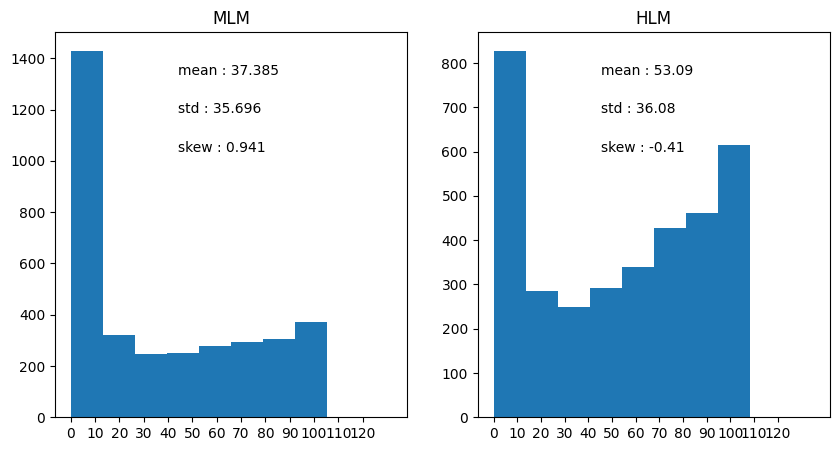

In [68]:
fig = plt.figure(figsize = (10, 5))


xticks = np.arange(0, 130, 10) 



for i in range(1,3):
# mlm 칼럼의 백분위수를 기반으로 구간을 정의
    ax = plt.subplot(1, 2, i)
    target = train.iloc[:,i]
    mean = target.mean().round(3)
    std = target.std().round(3)
    skew = (3*(mean - np.median(target))/target.std()).round(3)
    mean = target.mean().round(3)
    std = target.std().round(3)
    plt.hist(target,bins=10,histtype='bar')
    plt.xticks(xticks)
    plt.title(f"{train.columns[i]}")
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)


plt.show()

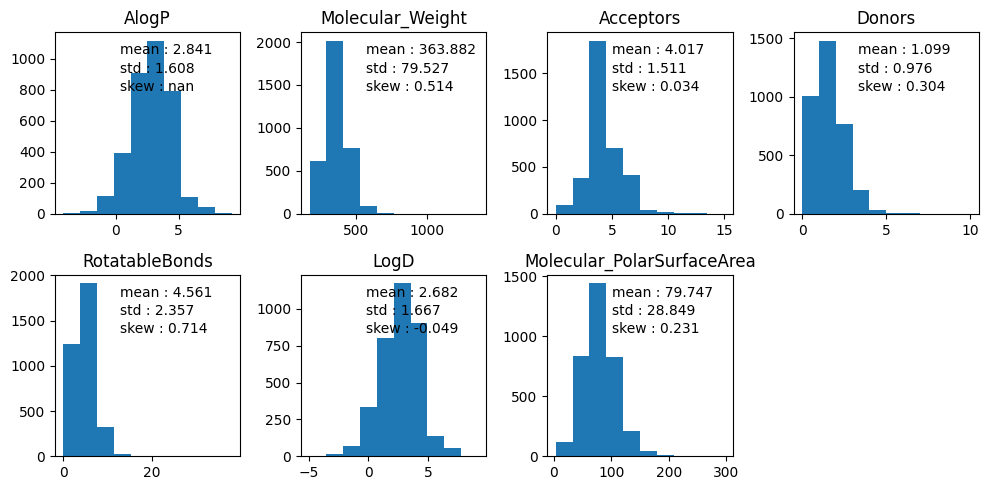

In [74]:
fig = plt.figure(figsize = (10, 5))

for i in range(1,8):
# mlm 칼럼의 백분위수를 기반으로 구간을 정의
    ax = plt.subplot(2, 4, i)
    target = train.iloc[:,i+2]
    mean = target.mean().round(3)
    std = target.std().round(3)
    skew = (3*(mean - np.median(target))/target.std()).round(3)
    mean = target.mean().round(3)
    std = target.std().round(3)
    plt.hist(target,bins=10,histtype='bar')
    plt.title(f"{train.columns[i+2]}")
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

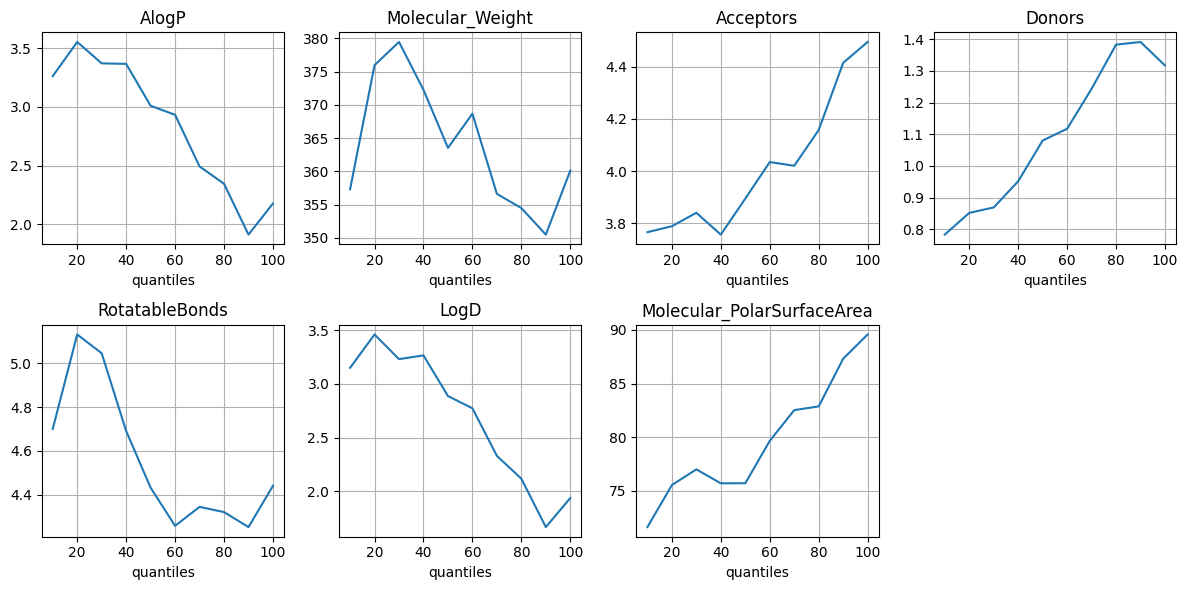

In [30]:
quantiles = np.arange(0,1.1,0.1)
label = np.arange(10,110,10)


mlm_df = train
mlm_df['quantile'] = pd.cut(mlm_df['MLM'],bins=mlm_df['MLM'].quantile(quantiles).values,labels=label,include_lowest=True)
print(mlm_df.columns)

fig = plt.figure(figsize = (12, 6))

for i in range(1,8):
# mlm 칼럼의 백분위수를 기반으로 구간을 정의
    ax = plt.subplot(2, 4, i)
    
    
    pivot = mlm_df.pivot_table(index={mlm_df.columns[10]}, values=mlm_df.columns[i+2], aggfunc='mean')
    plt.plot(pivot)
    plt.title(f"{mlm_df.columns[i+2]}")
    plt.grid(True)
    plt.xlabel("quantiles")

plt.tight_layout()

plt.show()


Index(['SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Acceptors',
       'Donors', 'RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea',
       'quantile'],
      dtype='object')


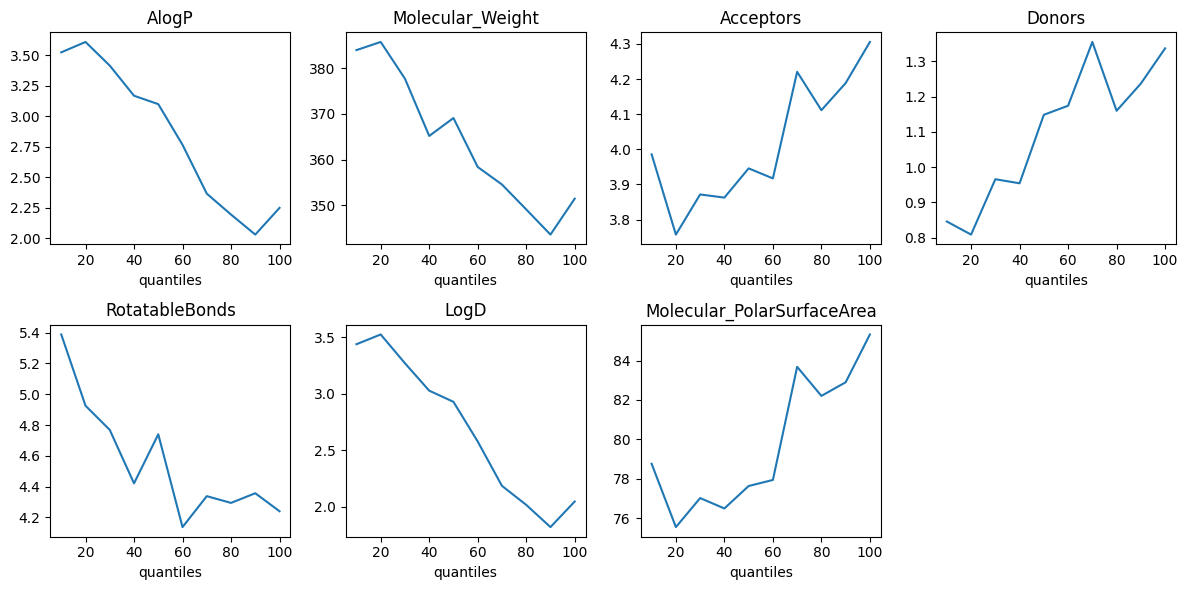

In [31]:
quantiles = np.arange(0,1.1,0.1)
label = np.arange(10,110,10)


hlm_df = train
hlm_df['quantile'] = pd.cut(hlm_df['HLM'],bins=hlm_df['HLM'].quantile(quantiles).values,labels=label,include_lowest=True)
print(hlm_df.columns)

fig = plt.figure(figsize = (12, 6))

for i in range(1,8):
# mlm 칼럼의 백분위수를 기반으로 구간을 정의
    ax = plt.subplot(2, 4, i)
    
    
    pivot = hlm_df.pivot_table(index={hlm_df.columns[10]}, values=hlm_df.columns[i+2], aggfunc='mean')
    plt.plot(pivot)
    plt.title(f"{hlm_df.columns[i+2]}")
    
    plt.xlabel("quantiles")

plt.tight_layout()

plt.show()
